<a href="https://colab.research.google.com/github/adammoss/MLiS2/blob/master/intro/backprop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let us again attempt to learn the XOR function using the same MLP network,  this time starting with random initial weights and using back-propogation with simple gradient descent.

The error functions for each neuron are
\begin{eqnarray}
\Delta_1^{(2)} &=& {\partial{J} \over \partial a_1^{(2)}}\,, \\
\Delta_1^{(1)} &=&  \Delta_1^{(2)} W_{11}^{(2)}   \Theta ( z_1^{(1)} )  \\
\Delta_2^{(1)} &=&  \Delta_1^{(2)} W_{21}^{(2)}  \Theta ( z_2^{(1)} )  \,,
\end{eqnarray}
since the Heaviside step function $\Theta$ is the derivative of the ReLU activation function.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [0]:
np.random.seed(2)

In [28]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
print(X)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]


In [29]:
Y = np.array([[0], [1], [1], [0]])
print(Y)

[[0]
 [1]
 [1]
 [0]]


Define the MLP model

In [0]:
class MLP(object):

  def __init__(self):
    # Initialise with random weights
    self.weights_1 = 0.1 * np.random.normal(size=(3,2))
    self.weights_2 = 0.1 * np.random.normal(size=(3,1))

  def forward(self, x):
    # Do a forward pass
    if len(x.shape) == 1:
      # Single example, so add a batch dimension of 1
      x = np.expand_dims(x, axis=0)
    # Hidden layer 
    z_1 = np.matmul(np.hstack((np.ones(shape=(x.shape[0], 1)), x)), self.weights_1)
    # Apply ReLU activation function
    a_1 = np.maximum(z_1, 0)
    # Output layer
    z_2 = np.matmul(np.hstack((np.ones(shape=(a_1.shape[0], 1)), a_1)), self.weights_2)
    # Linear activation 
    a_2 = z_2
    return z_1, a_1, z_2, a_2

Push the true solution through the network and check it gives zero loss

In [31]:
m = MLP()
m.weights_1 = np.array([[0, -1], [1,1], [1,1]], dtype=np.float)
m.weights_2 = np.array([[0], [1], [-2]], dtype=np.float)
z_1, a_1, z_2, a_2 = m.forward(X)
print(0.25 * np.sum((a_2 - Y)**2))

0.0


In [0]:
num_epochs = 500
learning_rate = 0.1

Update random initial weights and biases by back-prop

In [33]:
m = MLP()
loss_history = []
weights_1_history = []
weights_2_history = []
for epoch in range(num_epochs):
  # Do forward pass
  z_1, a_1, z_2, a_2 = m.forward(X)
  loss = 0.25 * np.sum((a_2 - Y)**2)
  loss_history.append(loss)
  if epoch % 100 == 0:
    print(epoch, loss)
  # Delta_2 has shape(4, 1), the first dimension being the batch dimension
  delta_2 = 0.5 * ( a_2 - Y)
  g_prime_1 = np.heaviside(z_1, 0)
  # Delta_1 has shape (4, 2)
  delta_1 = delta_2 * m.weights_2[1:3, 0] * g_prime_1
  # Biases of layers connecting input and hidden layers
  m.weights_1[0, :] -= learning_rate * np.sum(delta_1[:, :], axis=0)
  # Weights of layers connecting input and hidden layers 
  m.weights_1[1:3, :] -= learning_rate * np.matmul(X.T, delta_1)
  # Biases of layers connecting hidden and output layers
  m.weights_2[0, 0] -= learning_rate * np.sum(delta_2[:, :], axis=0)
  # Weights of layers connecting hidden and output layers
  m.weights_2[1:3, 0:1] -= learning_rate * np.matmul(a_1.T, delta_2)
  weights_1_history.append(np.copy(m.weights_1))
  weights_2_history.append(np.copy(m.weights_2))
loss_history = np.array(loss_history)
weights_1_history = np.array(weights_1_history)
weights_2_history = np.array(weights_2_history)

0 0.5523485297294992
100 0.2075926848506814
200 0.11289892843584105
300 0.0014812675618753799
400 3.4251827763133192e-06


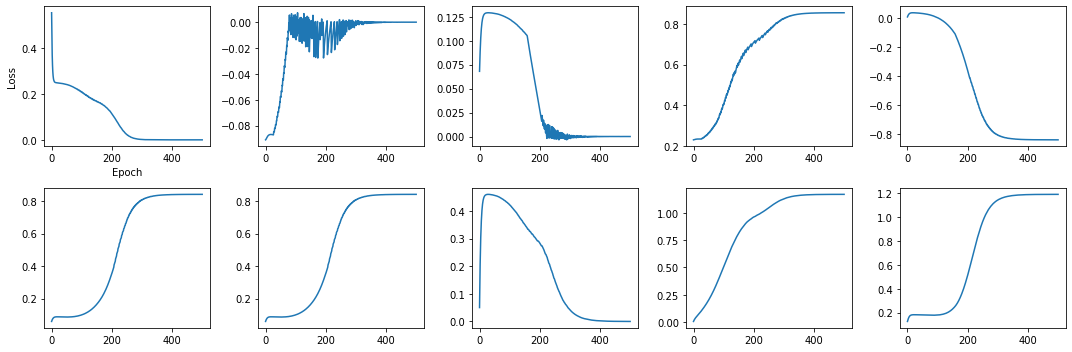

In [34]:
plt.figure(figsize=(15, 5))
ax = plt.subplot(2, 5, 1)
ax.plot(loss_history[:])
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax = plt.subplot(2, 5, 2)
ax.plot(weights_1_history[:,0,0])
ax = plt.subplot(2, 5, 3)
ax.plot(weights_1_history[:,0,1])
ax = plt.subplot(2, 5, 4)
ax.plot(weights_1_history[:,1,0])
ax = plt.subplot(2, 5, 5)
ax.plot(weights_1_history[:,1,1])
ax = plt.subplot(2, 5, 6)
ax.plot(weights_1_history[:,2,1])
ax = plt.subplot(2, 5, 7)
ax.plot(weights_1_history[:,2,1])
ax = plt.subplot(2, 5, 8)
ax.plot(weights_2_history[:,0,0])
ax = plt.subplot(2, 5, 9)
ax.plot(weights_2_history[:,1,0])
ax = plt.subplot(2, 5, 10)
ax.plot(weights_2_history[:,2,0])
plt.tight_layout()
plt.show()

In [35]:
print(m.weights_1)

[[ 2.89951162e-06 -5.72659156e-06]
 [ 8.55850924e-01 -8.40680620e-01]
 [-8.55849632e-01  8.40673755e-01]]


In [36]:
print(m.weights_2)

[[9.82877968e-05]
 [1.16823513e+00]
 [1.18931798e+00]]


In [37]:
z_1, a_1, z_2, a_2 = m.forward(X)
print(a_2)

[[1.01675108e-04]
 [9.99919890e-01]
 [9.99936789e-01]
 [1.03184563e-04]]
